In [50]:
import pandas as pd
import sys
sys.path.append('../greykite')

In [51]:
import pandas as pd
import greykite
from greykite.framework.templates.autogen.forecast_config import ForecastConfig
from greykite.framework.templates.autogen.forecast_config import MetadataParam
from greykite.framework.templates.forecaster import Forecaster
from greykite.framework.templates.model_templates import ModelTemplateEnum
import datetime
import plotly

#Supress default INFO logging
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import logging
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)
import logging, sys
warnings.simplefilter(action='ignore', category=FutureWarning)

In [52]:
data = pd.read_csv('ZOR_ZIPcodes_AllHomesPlusMultifamily_Smoothed.csv')

In [53]:
# data.info()

In [54]:
data_nyc = data[data['MsaName'] == 'New York, NY']
data_nyc

,RegionID,RegionName,SizeRank,MsaName,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,...,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06
0,61639,10025,1,"New York, NY",2923.0,2849.0,2932.0,2955.0,2946.0,2957.0,...,2867.0,2845.0,2808.0,2778.0,2813.0,2784.0,2848.0,2908.0,2992.0,3056.0
2,61637,10023,3,"New York, NY",2908.0,2928.0,2964.0,2955.0,2973.0,3032.0,...,2865.0,2790.0,2706.0,2667.0,2696.0,2739.0,2770.0,2843.0,2892.0,2981.0
6,61616,10002,7,"New York, NY",2757.0,2659.0,2722.0,2745.0,2784.0,2791.0,...,2777.0,2667.0,2627.0,2606.0,2602.0,2621.0,2660.0,2765.0,2884.0,2971.0
10,62037,11226,11,"New York, NY",1784.0,1764.0,1763.0,1737.0,1736.0,1732.0,...,2089.0,2072.0,2029.0,1988.0,1976.0,1988.0,2007.0,2028.0,2050.0,2065.0
13,61630,10016,16,"New York, NY",3184.0,3094.0,3164.0,3172.0,3212.0,3207.0,...,3071.0,2979.0,2852.0,2836.0,2852.0,2865.0,2924.0,3012.0,3116.0,3255.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1697,61887,10601,6403,"New York, NY",2014.0,2046.0,2091.0,2174.0,2254.0,2329.0,...,2531.0,2493.0,2523.0,2486.0,2491.0,2544.0,2507.0,2540.0,2542.0,2541.0
1714,61771,10280,6946,"New York, NY",3105.0,2961.0,3101.0,3146.0,3252.0,3265.0,...,3136.0,3163.0,3204.0,3214.0,3208.0,3166.0,3149.0,3201.0,3328.0,3568.0
1732,61664,10069,7587,"New York, NY",4423.0,4510.0,4591.0,4611.0,4264.0,4544.0,...,3799.0,3701.0,3632.0,3598.0,3550.0,3586.0,3603.0,3685.0,3733.0,3908.0
1737,61621,10007,7859,"New York, NY",4971.0,5626.0,NaN,5272.0,5427.0,5560.0,...,5306.0,5425.0,5080.0,4832.0,4766.0,4827.0,5022.0,5193.0,5512.0,5838.0


In [55]:
data_nyc.reset_index(inplace=True, drop=True)

In [56]:
data_nyc_list = data_nyc.columns.values.tolist()

In [57]:
del data_nyc_list[0]
del data_nyc_list[2]
del data_nyc_list[1]

In [147]:
data_nyc_list_new = data_nyc_list
data_nyc_list_new

['RegionName',
 '2014-01',
 '2014-02',
 '2014-03',
 '2014-04',
 '2014-05',
 '2014-06',
 '2014-07',
 '2014-08',
 '2014-09',
 '2014-10',
 '2014-11',
 '2014-12',
 '2015-01',
 '2015-02',
 '2015-03',
 '2015-04',
 '2015-05',
 '2015-06',
 '2015-07',
 '2015-08',
 '2015-09',
 '2015-10',
 '2015-11',
 '2015-12',
 '2016-01',
 '2016-02',
 '2016-03',
 '2016-04',
 '2016-05',
 '2016-06',
 '2016-07',
 '2016-08',
 '2016-09',
 '2016-10',
 '2016-11',
 '2016-12',
 '2017-01',
 '2017-02',
 '2017-03',
 '2017-04',
 '2017-05',
 '2017-06',
 '2017-07',
 '2017-08',
 '2017-09',
 '2017-10',
 '2017-11',
 '2017-12',
 '2018-01',
 '2018-02',
 '2018-03',
 '2018-04',
 '2018-05',
 '2018-06',
 '2018-07',
 '2018-08',
 '2018-09',
 '2018-10',
 '2018-11',
 '2018-12',
 '2019-01',
 '2019-02',
 '2019-03',
 '2019-04',
 '2019-05',
 '2019-06',
 '2019-07',
 '2019-08',
 '2019-09',
 '2019-10',
 '2019-11',
 '2019-12',
 '2020-01',
 '2020-02',
 '2020-03',
 '2020-04',
 '2020-05',
 '2020-06',
 '2020-07',
 '2020-08',
 '2020-09',
 '2020-10',
 

In [59]:
data_nyc_1=data_nyc[data_nyc_list_new].copy()

In [60]:
#There are 95 distinct unique rows with 94 values
len(data_nyc.RegionName.unique())

95

In [61]:
# data_nyc.melt(id_vars=[""])

In [204]:
data_nyc_1.head()

,RegionName,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,...,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06
0,10025,2923.0,2849.0,2932.0,2955.0,2946.0,2957.0,3007.0,3033.0,3013.0,...,2867.0,2845.0,2808.0,2778.0,2813.0,2784.0,2848.0,2908.0,2992.0,3056.0
1,10023,2908.0,2928.0,2964.0,2955.0,2973.0,3032.0,3021.0,3025.0,3024.0,...,2865.0,2790.0,2706.0,2667.0,2696.0,2739.0,2770.0,2843.0,2892.0,2981.0
2,10002,2757.0,2659.0,2722.0,2745.0,2784.0,2791.0,2841.0,2849.0,2858.0,...,2777.0,2667.0,2627.0,2606.0,2602.0,2621.0,2660.0,2765.0,2884.0,2971.0
3,11226,1784.0,1764.0,1763.0,1737.0,1736.0,1732.0,1791.0,1792.0,1747.0,...,2089.0,2072.0,2029.0,1988.0,1976.0,1988.0,2007.0,2028.0,2050.0,2065.0
4,10016,3184.0,3094.0,3164.0,3172.0,3212.0,3207.0,3241.0,3266.0,3283.0,...,3071.0,2979.0,2852.0,2836.0,2852.0,2865.0,2924.0,3012.0,3116.0,3255.0


In [149]:
len(data_nyc_1['RegionName'])

95

In [153]:
testicle = list(data_nyc_1['RegionName'])
testicle

[10025,
 10023,
 10002,
 11226,
 10016,
 11201,
 11375,
 10029,
 10009,
 10011,
 10128,
 11206,
 10019,
 10003,
 10463,
 11209,
 11221,
 7030,
 10024,
 11207,
 10458,
 11211,
 11377,
 7302,
 11238,
 11215,
 11373,
 8753,
 10028,
 7002,
 10027,
 7093,
 10701,
 11218,
 10021,
 7087,
 11213,
 10032,
 10031,
 11216,
 11354,
 7047,
 10014,
 8873,
 7306,
 10036,
 11374,
 12550,
 10033,
 7024,
 10010,
 10022,
 11432,
 7960,
 8816,
 7304,
 10065,
 11205,
 8817,
 10001,
 11435,
 11249,
 10034,
 7307,
 10026,
 10013,
 11231,
 10035,
 8807,
 10075,
 10012,
 10801,
 10030,
 11104,
 10017,
 7042,
 7013,
 7920,
 11415,
 10954,
 8536,
 7450,
 7901,
 7094,
 11021,
 11501,
 7086,
 10018,
 10005,
 10606,
 10601,
 10280,
 10069,
 10007,
 10006]

In [146]:
data_nyc_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 91 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RegionName  95 non-null     int64  
 1   2014-01     89 non-null     float64
 2   2014-02     87 non-null     float64
 3   2014-03     80 non-null     float64
 4   2014-04     94 non-null     float64
 5   2014-05     94 non-null     float64
 6   2014-06     93 non-null     float64
 7   2014-07     93 non-null     float64
 8   2014-08     94 non-null     float64
 9   2014-09     92 non-null     float64
 10  2014-10     92 non-null     float64
 11  2014-11     90 non-null     float64
 12  2014-12     91 non-null     float64
 13  2015-01     94 non-null     float64
 14  2015-02     90 non-null     float64
 15  2015-03     94 non-null     float64
 16  2015-04     93 non-null     float64
 17  2015-05     94 non-null     float64
 18  2015-06     95 non-null     float64
 19  2015-07     94 non-null     flo

In [63]:
########HERE I CHOOSE WHAT ZIP CODE I WANT. JUST PLUG AND PLAY!!!!###########
zip_code_wanted = 10069

row_number = data_nyc_1[data_nyc_1['RegionName']==zip_code_wanted].index

type(row_number)


pandas.core.indexes.numeric.Int64Index

In [64]:
# I dont need regionname after this because I know which row I chose 
#iloc[0] corresponds to 10025 zip code
data_nyc_2 = data_nyc_1.iloc[:,1:91]

In [65]:
data_nyc_3=pd.DataFrame(data_nyc_2.iloc[row_number].copy())

In [66]:
data_nyc_3 = data_nyc_3.transpose()

In [67]:
data_nyc_3.index.rename('ds', inplace=True)
# data_nyc_3.columns = data_nyc_3.columns.astype(str)

list_data_nyc_3 = list(data_nyc_3.columns.values.tolist())
data_nyc_3.rename(columns={list_data_nyc_3[0]:'y'}, inplace=True)
list_data_nyc_3
data_nyc_3

,y
ds,
2014-01,4423.0
2014-02,4510.0
2014-03,4591.0
2014-04,4611.0
2014-05,4264.0
...,...
2021-02,3586.0
2021-03,3603.0
2021-04,3685.0


In [68]:
data_nyc_3.columns

Index(['y'], dtype='object')

<AxesSubplot:title={'center':'10069'}, xlabel='ds'>

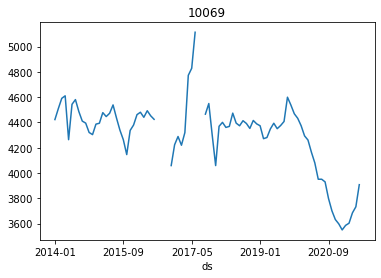

In [69]:
data_nyc_3.plot(title=f'{zip_code_wanted}', legend=False)

In [192]:


def zip_plot (zip_code_wanted):
    row_number = data_nyc_1[data_nyc_1['RegionName']==zip_code_wanted].index
    data_nyc_2 = data_nyc_1.iloc[:,1:91]
    data_nyc_3=pd.DataFrame(data_nyc_2.iloc[row_number].copy())
    data_nyc_3 = data_nyc_3.transpose()
    data_nyc_3.index.rename('ts', inplace=True)
    list_data_nyc_3 = list(data_nyc_3.columns.values.tolist())
    data_nyc_3.rename(columns={list_data_nyc_3[0]:zip_code_wanted}, inplace=True)
    data_nyc_3.plot(title=f'{zip_code_wanted}', legend=False, ax=ax)

In [193]:
zip_plot(11432)

AttributeError: 'numpy.ndarray' object has no attribute 'get_figure'

In [88]:
#create fig, ax
# grid of 90+
# do linkedingreykite for each one

data_nyc_3 = data_nyc_3.reset_index()
data_nyc_3.rename(columns={'ds':'ts'}, inplace=True)
data_nyc_3.fillna(0)






,index,ts,y
0,0,2014-01,4423.0
1,1,2014-02,4510.0
2,2,2014-03,4591.0
3,3,2014-04,4611.0
4,4,2014-05,4264.0
...,...,...,...
85,85,2021-02,3586.0
86,86,2021-03,3603.0
87,87,2021-04,3685.0
88,88,2021-05,3733.0


In [180]:
# import matplotlib.pyplot as plt

# # fig = plt.figure(figsize=(50,50))
# fig.suptitle('RENT PRICES', fontsize=16, y = 0.92)

# fig, axs = plt.subplots(25,4)
# for i in range(len(testicle)):
#     turd = testicle[i]
# #     plt.subplot(25, 4, i+1)    
#     axs= zip_plot(turd)
# #     print(turd)
# plt.show()

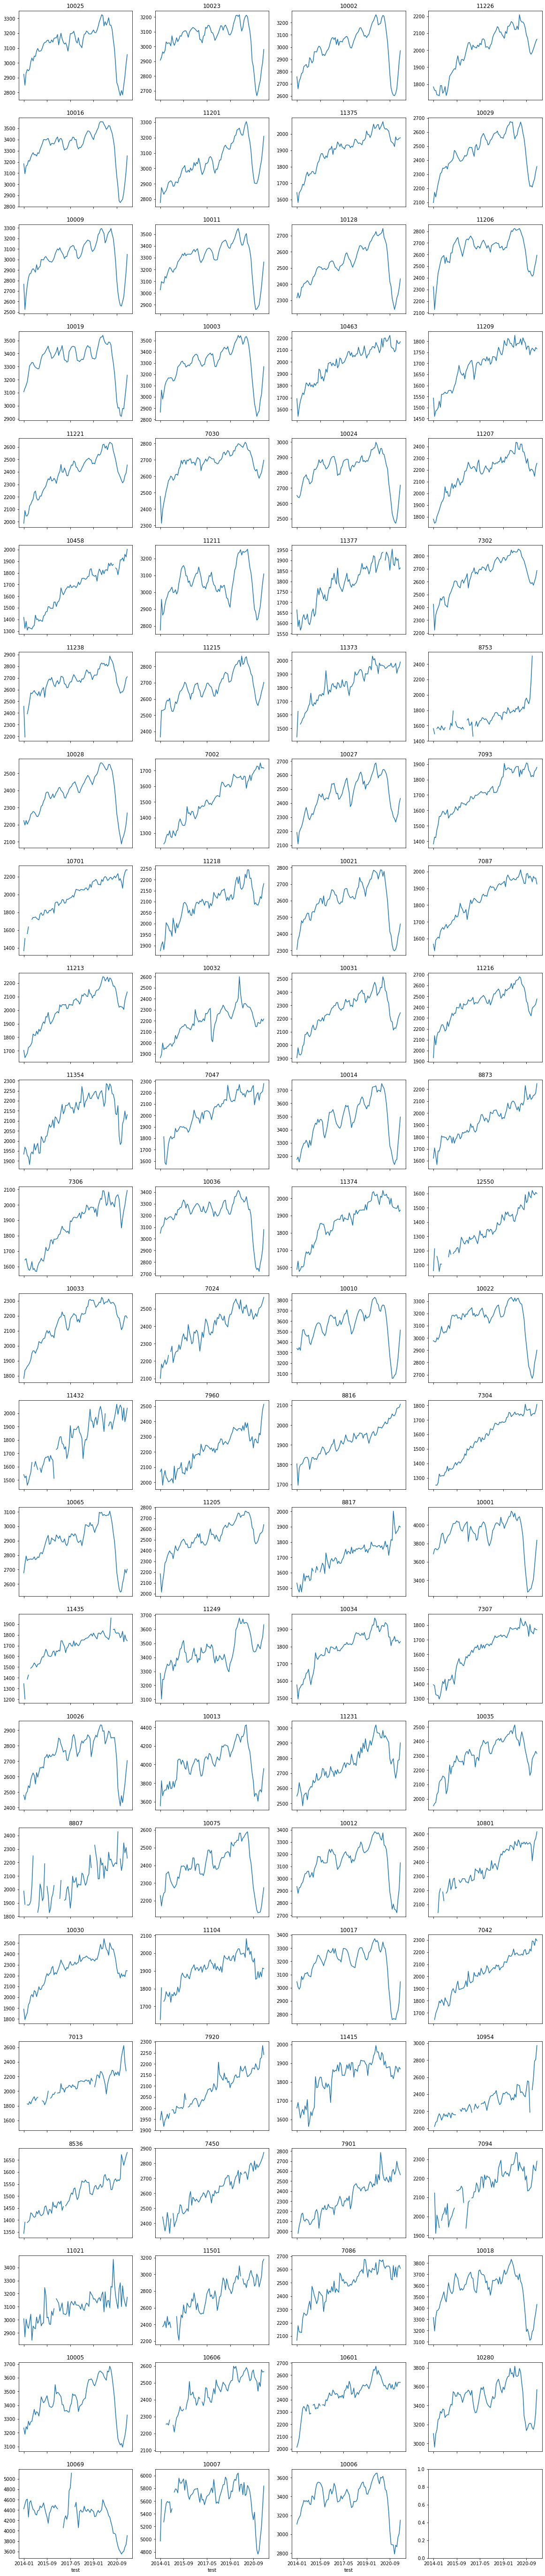

In [203]:
fig, axes = plt.subplots(nrows=24, ncols=4, figsize=(20,100), sharex=True, sharey=False)
for teste, ax in zip(testicle, axes.ravel()):
    zip_plot(teste)
    ax.set_xlabel('test')

In [191]:
for ticker, ax in zip(tickers, axes.ravel()):
    zip_plot

0
[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]
1
[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]
2
[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]
3
[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]
4
[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]
5
[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]
6
[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]
7
[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]
8
[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]
9
[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]
10
[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]
11
[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]
12
[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]
13
[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]
14
[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]
15
[<AxesSubplot:> <AxesSubplot:> <

In [89]:
# df = ...  # your input timeseries!
df=data_nyc_3
metadata = MetadataParam(
    time_col= 'ts',     # time column in `df`
    value_col='y'      # value in `df`
)
forecaster = Forecaster()  # creates forecasts and stores the result
result = forecaster.run_forecast_config(
     df=data_nyc_3,
     config=ForecastConfig(
         # uses the SILVERKITE model template parameters
         model_template=ModelTemplateEnum.SILVERKITE.name,
         forecast_horizon=30,  # forecasts 30 steps ahead
         coverage=0.80,         # 95% prediction intervals
         metadata_param=metadata
     )
 )
# Access the result
forecaster.forecast_result

Fitting 1 folds for each of 1 candidates, totalling 1 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.3s finished


ForecastResult(timeseries=<greykite.framework.input.univariate_time_series.UnivariateTimeSeries object at 0x000001F27E9F7FA0>, grid_search=RandomizedSearchCV(cv=RollingTimeSeriesSplit(expanding_window=True, forecast_horizon=30,
            max_splits=3, min_train_periods=60, periods_between_splits=30,
            periods_between_train_test=0, use_most_recent_splits=False),
                   estimator=Pipeline(steps=[('input',
                                              PandasFeatureUnion(transformer_list=[('date',
                                                                                    Pipeline(steps=[('select_date',
                                                                                                     ColumnSelector(column_names=['ts'...
                            'OutsideTolerance3p': make_scorer(score_func_finite),
                            'OutsideTolerance4p': make_scorer(score_func_finite),
                            'OutsideTolerance5p': make_scor

In [90]:
ts = result.timeseries
fig = ts.plot()
plotly.io.show(fig)

In [91]:
ts = result.timeseries
fig = ts.plot()
plotly.io.show(fig)

In [92]:
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)   # for generating offline graphs within Jupyter Notebook

backtest = result.backtest
fig = backtest.plot()
iplot(fig)

In [93]:
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

fig = backtest.plot_components()
iplot(fig)  # fi

In [94]:


from plotly.offline import init_notebook_mode, iplot
from greykite.common.evaluation import EvaluationMetricEnum

init_notebook_mode(connected=True)   # for generating offline graphs within Jupyter Notebook

# MAPE by day of week
fig = backtest.plot_grouping_evaluation(
    score_func=EvaluationMetricEnum.MeanAbsolutePercentError.get_metric_func(),
    score_func_name=EvaluationMetricEnum.MeanAbsolutePercentError.get_metric_name(),
    which="train", # "train" or "test" set
    groupby_time_feature="dow",  # day of week
    groupby_sliding_window_size=None,
    groupby_custom_column=None)
iplot(fig)

# RMSE over time
fig = backtest.plot_grouping_evaluation(
    score_func=EvaluationMetricEnum.RootMeanSquaredError.get_metric_func(),
    score_func_name=EvaluationMetricEnum.RootMeanSquaredError.get_metric_name(),
    which="test", # "train" or "test" set
    groupby_time_feature=None,
    groupby_sliding_window_size=7,  # weekly aggregation of daily data
    groupby_custom_column=None)
iplot(fig)



In [95]:


 summary = result.model[-1].summary()  # -1 retrieves the estimator from the pipeline
 print(summary)



================================ Model Summary =================================

Number of observations: 90,   Number of features: 57
Method: Ridge regression
Number of nonzero features: 18
Regularization parameter: 3054.0

Residuals:
         Min           1Q       Median           3Q          Max
      -729.9       -73.73        61.15        140.1        800.5

             Pred_col  Estimate Std. Err Pr(>)_boot sig. code               95%CI
            Intercept    4344.0    22.64     <2e-16       ***    (4296.0, 4386.0)
  events_C...New Year        0.       0.      1.000                      (0., 0.)
  events_C...w Year-1        0.       0.      1.000                      (0., 0.)
  events_C...w Year-2        0.       0.      1.000                      (0., 0.)
  events_C...w Year+1   0.05447  0.05411      0.508                  (0., 0.1765)
  events_C...w Year+2        0.       0.      1.000                      (0., 0.)
 events_Christmas Day        0.       0.      1.000        

In [144]:
def zip_plot_1 (zip_code_wanted):
    row_number = data_nyc_1[data_nyc_1['RegionName']==zip_code_wanted].index
    data_nyc_2 = data_nyc_1.iloc[:,1:91]
    data_nyc_3=pd.DataFrame(data_nyc_2.iloc[row_number].copy())
    data_nyc_3 = data_nyc_3.transpose()
    data_nyc_3.index.rename('ts', inplace=True)
    list_data_nyc_3 = list(data_nyc_3.columns.values.tolist())
    data_nyc_3.rename(columns={list_data_nyc_3[0]:'y'}, inplace=True)
#     data_nyc_3.plot(title=f'{zip_code_wanted}', legend=False)
    data_nyc_3 = data_nyc_3.reset_index()
    data_nyc_3.rename(columns={'ds':'ts'}, inplace=True)
    data_nyc_3.fillna(0)
    

    data_nyc_3.index= pd.to_datetime(data_nyc_3.index)


    
    df=data_nyc_3
    metadata = MetadataParam(
        time_col= 'ts',     # time column in `df`
        value_col='y'      # value in `df`
    )
    forecaster = Forecaster()  # creates forecasts and stores the result
    result = forecaster.run_forecast_config(
         df=data_nyc_3,
         config=ForecastConfig(
             # uses the SILVERKITE model template parameters
             model_template=ModelTemplateEnum.SILVERKITE.name,
             forecast_horizon=10,  # forecasts 30 steps ahead
             coverage=0.95,         # 95% prediction intervals
             metadata_param=metadata
         )
     )
    # Access the result
    forecaster.forecast_result
    
    from plotly.offline import init_notebook_mode, iplot
    init_notebook_mode(connected=True)   # for generating offline graphs within Jupyter Notebook

    backtest = result.backtest
    fig = backtest.plot()
    iplot(fig)

In [145]:
zip_plot_1 (11432)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   10.1s finished
